In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.available

# Subplots

Sometimes its good to have multiple plots in one space so that they can be compared side by side. For this matplotlib has the subplots feature that allows multiple smaller axes inside one figure. These subplots individually can be whatever they want, but as a whole, all of them come together to form a figure with multiple subplots.

## `plt.axes()`: Subplots by Hand

The most basic way of creating an `axes()` instance that fills one entire figure. It takes in four positional arguments, that are of the format `[left, bottom, width, height]`

<Axes: label='This'>

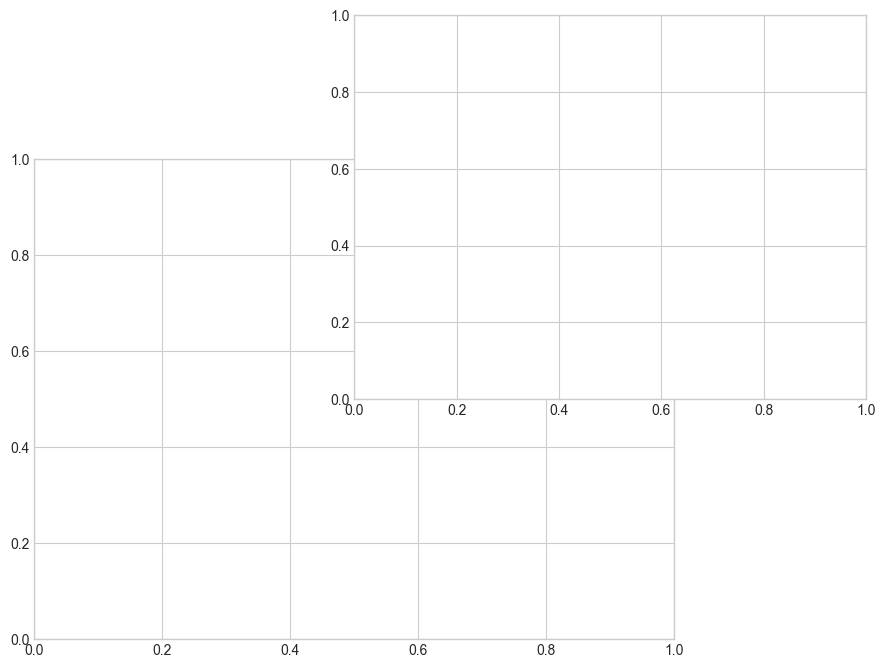

In [2]:
plt.axes([0,0,1,1])
plt.axes([.5,.5,.8,.8],label='This')

The equivalent of this command within the object-oriented interface is fig.add_axes(). Let's use this to create two vertically stacked axes:

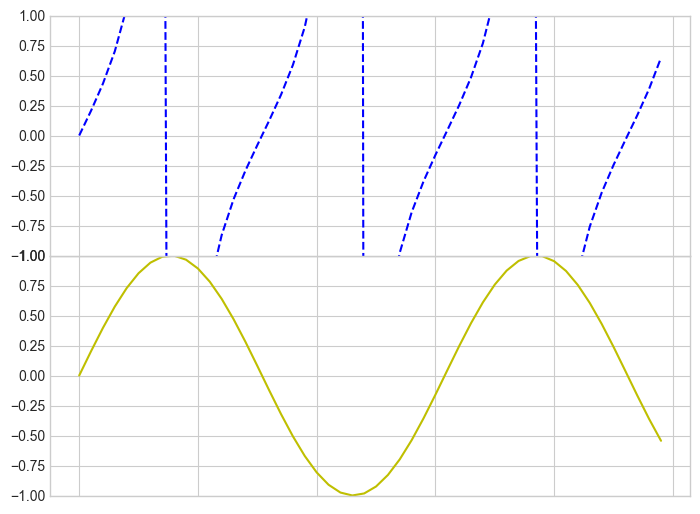

In [3]:
fig=plt.figure()
ax1=fig.add_axes((0,0,1,.5),xticklabels=[],ylim=(-1,1))
ax2=fig.add_axes((0,0.5,1,.5),xticklabels=[],ylim=(-1,1))
x=np.linspace(0,10)
ax1.plot(np.sin(x),'-y')
ax2.plot(np.tan(x),'--b')

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `plt.subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:



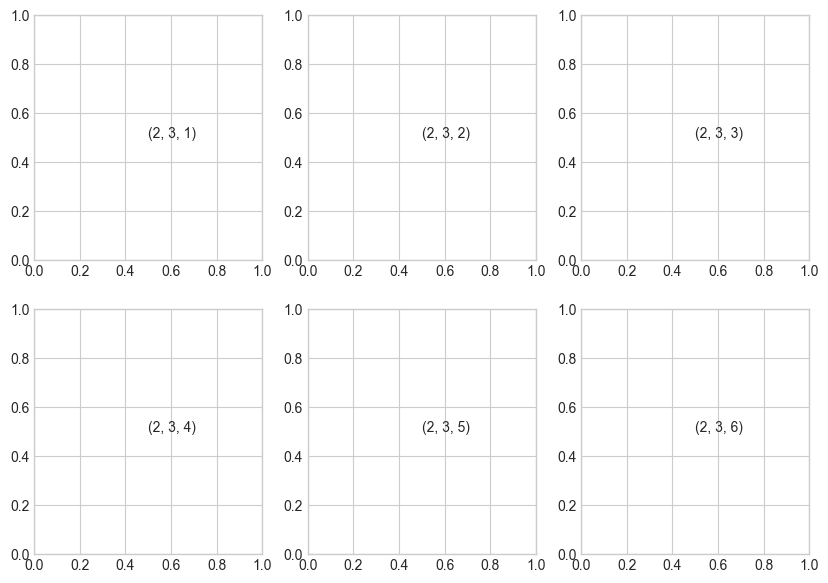

In [4]:
plt.figure(figsize=(10,7))
for i in range(1,7):
    plt.subplot(2,3,i,)
    plt.text(.5,.5,str((2,3,i)))

The command plt.subplots_adjust can be used to adjust the spacing between these plots. The following code uses the equivalent object-oriented command, fig.add_subplot():

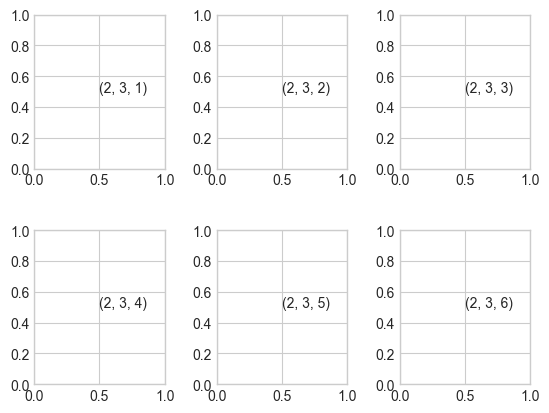

In [5]:
fig=plt.figure()
fig.subplots_adjust(hspace=.4,wspace=.4)
for i in range(1,7):
    ax=fig.add_subplot(2,3,i)
    ax.text(.5,.5,str((2,3,i)))

## `plt.subplots`: The Whole Grid in One Go

The previous methods makes the generated plots vizually tedious to track. It's, thus, better to have one common x and y axis labels for each row and colomn. This can be achieved using the plt.subplots (notice that it's *subplots* and not *subplot*) function.

This function generates the necessary subplots and returns the figure and the axes in a numpy array. Additional parameters of this visualization can be adjusted by keywords like `sharex` and `sharey` 

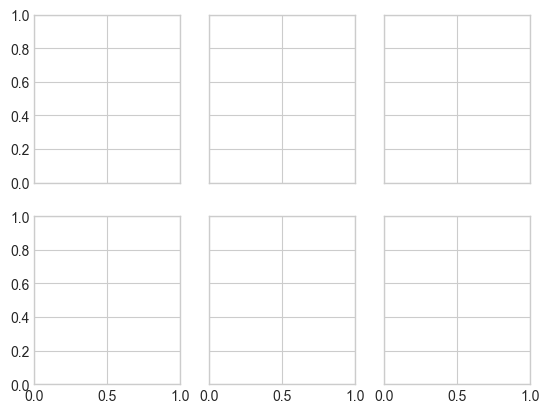

In [6]:
fig,ax=plt.subplots(2,3,sharex='col',sharey='row')

Notice that now the subplots look mjch cleaner. Now we can access each of the subplot `ax`'s individually and make changest to them.

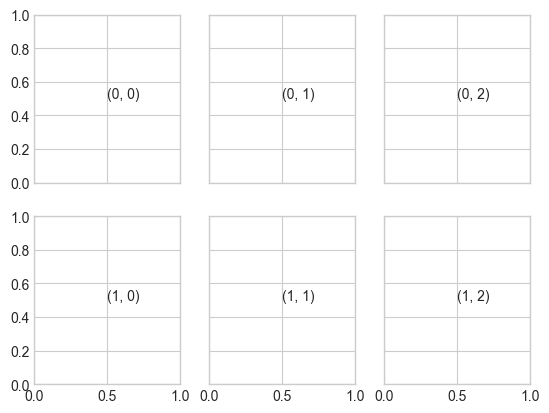

In [7]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(.5,.5,str((i,j)))

fig

## `plt.GridSpec`:More Complicated Arrangements

The function GridSpec creates a framework on which the rest of the subplots can be created. Let's see the following example

In [8]:
grid=plt.GridSpec(2,3,wspace=.4,hspace=.3)

<Axes: >

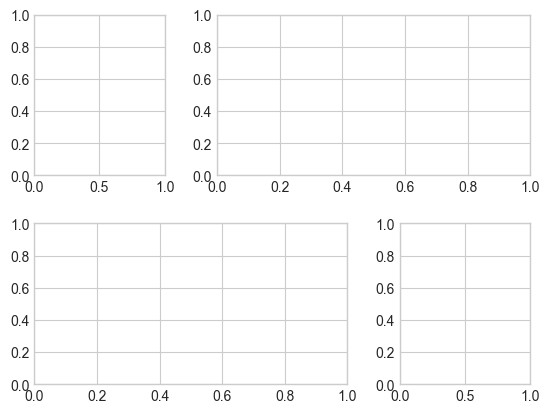

In [9]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

This type of flexible grid alignment has a wide range of uses. I most often use it when creating multi-axes histogram plots like the ones shown here:

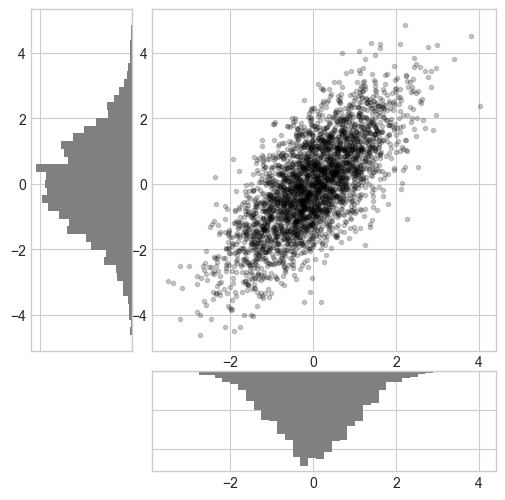

In [27]:
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,3000).T

fig=plt.figure(figsize=(6,6))
grid=plt.GridSpec(4,4,hspace=.2,wspace=.2)
main_ax=fig.add_subplot(grid[:-1,1:])
y_hist=fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist=fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

main_ax.plot(x,y,'ok',markersize=3,alpha=.2)

x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color='gray')
x_hist.invert_yaxis()

y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis()